In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from matplotlib.pyplot import rcParams



In [5]:
df=pd.read_csv("monthly-beer-production-in-austr.csv")
df.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [13]:
#Parse and Plot check
dateparse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')

In [14]:
data=pd.read_csv("monthly-beer-production-in-austr.csv",
                parse_dates=["Month"],index_col='Month',date_parser=dateparse)

<ipython-input-13-8f5a43c8eac5>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')


In [15]:
ts=data["Monthly beer production in Australia"]

<AxesSubplot:xlabel='Month'>

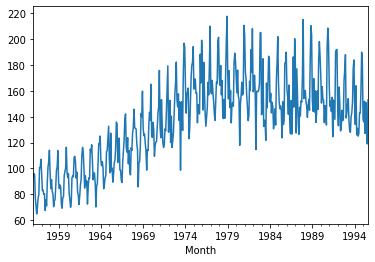

In [16]:
ts.plot()

Text(0, 0.5, 'consumption in megalitres')

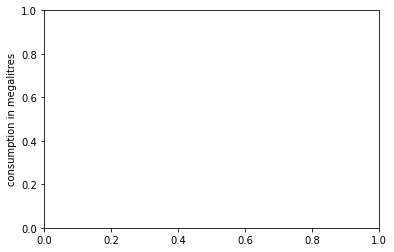

In [18]:
plt.ylabel("consumption in megalitres")

In [22]:
#Stationary check
from statsmodels.tsa.stattools import adfuller

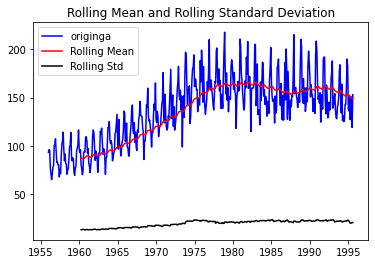

Results of Dickey-Fuller Test:
Test Statistic                  -2.282661
p-value                          0.177621
#Lag values used                17.000000
Number of observations used    458.000000
critical value 1%               -3.444709
dtype: float64
Test Statistic                  -2.282661
p-value                          0.177621
#Lag values used                17.000000
Number of observations used    458.000000
critical value 1%               -3.444709
critical value 5%               -2.867871
dtype: float64
Test Statistic                  -2.282661
p-value                          0.177621
#Lag values used                17.000000
Number of observations used    458.000000
critical value 1%               -3.444709
critical value 5%               -2.867871
critical value 10%              -2.570142
dtype: float64


In [29]:
def test_stationairity(timeseries):
    #determining rolling statisticks
    
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    #plot rolling statisticks
    orig=plt.plot(timeseries,color='blue',label="originga")
    mean=plt.plot(rolmean,color='red',label="Rolling Mean")
    std=plt.plot(rolstd,color="black",label="Rolling Std")
    plt.legend(loc='best')
    plt.title("Rolling Mean and Rolling Standard Deviation")
    plt.show(block=False)
    #perform dickey-fuller test
    print("Results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag values used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value %s'%key]=value
        print(dfoutput)
        
test_stationairity(data["Monthly beer production in Australia"])
    

In [30]:
#the test statistic is more than critical value and moving average is not constant overtime.
#so,the null hypothesis of the Dickey-Fuller Test cannot be rejected.
#this show that the time series is not stationary.


In [94]:
ts_log=np.log(ts)

In [54]:
#Stationarize


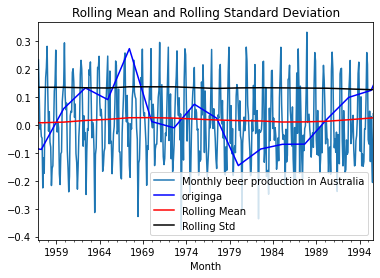

Results of Dickey-Fuller Test:
Test Statistic                  -3.432559
p-value                          0.009898
#Lag values used                13.000000
Number of observations used    451.000000
critical value 1%               -3.444933
dtype: float64
Test Statistic                  -3.432559
p-value                          0.009898
#Lag values used                13.000000
Number of observations used    451.000000
critical value 1%               -3.444933
critical value 5%               -2.867970
dtype: float64
Test Statistic                  -3.432559
p-value                          0.009898
#Lag values used                13.000000
Number of observations used    451.000000
critical value 1%               -3.444933
critical value 5%               -2.867970
critical value 10%              -2.570195
dtype: float64


In [101]:
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log-moving_avg
ts_log_moving_avg_diff.dropna(inplace = True) # Remove na value inplace=True for local replacement
#test_stationarity(ts_log_moving_avg_diff)
#ts_log+mv_diff.plot()
ts_log_moving_avg_diff.plot()
test_stationairity(ts_log_moving_avg_diff)


In [ ]:
#since the Test Statistick <5 % of critical value ,so Reject null hypothesis.

In [62]:
pd.__version__

'1.2.4'

In [102]:
print("Beer Project Success")

Beer Project Success
